In [1]:
# import all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
netflix_titles = pd.read_csv('netflix_titles.csv', parse_dates=['date_added'])
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_titles = netflix_titles[netflix_titles['date_added'].notna()]
netflix_titles['year_added'] = netflix_titles['date_added'].dt.year

In [4]:
recent_shows = pd.DataFrame(netflix_titles[netflix_titles['year_added'] > 2015])
# recent_shows

In [5]:
movies = netflix_titles[netflix_titles['type'] == 'Movie']
# movies

In [6]:
tv_shows = netflix_titles[netflix_titles['type'] == 'TV Show']
# tv_shows

# Movies vs. TV Shows

This dataset contains a total of 7787 shows; 5377 of them are movies while 2410 are TV shows. This seems to suggest that movies are more popular than TV shows on Netflix.

However, an analysis of the trends over time shows that TV shows have become more and more popular.

In [7]:
plt.rcParams['axes.facecolor'] = '#fce5cd'
#axes = df.plot.bar(rot=0, subplots=True)

Text(0, 0.5, 'No. of Movies')

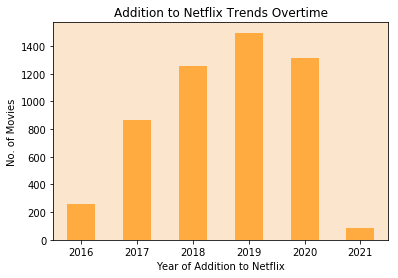

In [8]:
recent_movies = movies[movies['year_added'] > 2015]
movie_trends = recent_movies.groupby('year_added')['type'].count()
movie_trends_plot = movie_trends.plot.bar(title='Addition to Netflix Trends Overtime', figsize=(6,4), rot=0, color='#ffab40')
movie_trends_plot.set_xlabel('Year of Addition to Netflix')
movie_trends_plot.set_ylabel('No. of Movies')

Text(0, 0.5, 'No. of TV Shows')

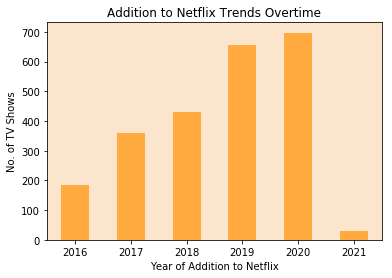

In [9]:
recent_tv_shows = tv_shows[tv_shows['year_added'] > 2015]
tv_shows_trends = recent_tv_shows.groupby('year_added')['type'].count()
#movie_trends.head()
tv_shows_trends_plot = tv_shows_trends.plot.bar(title='Addition to Netflix Trends Overtime', figsize=(6,4), rot=0, color='#ffab40')
tv_shows_trends_plot.set_xlabel('Year of Addition to Netflix')
tv_shows_trends_plot.set_ylabel('No. of TV Shows')

The 2 barplots above clearly show that the popularity of movies released in the last 20 years is declining while the TV shows are gaining some grounds.

Conclusions:
Zuckflix should focus on the production of TV shows as their market and popularity is most likely going to keep growing in the next few years.

# All Shows Ratings

Overall, shows rated as TV-MA, TV-14, TV-PG, R, and TV-Y seem to be the most popular although a few differences might arise depending on whether it's a movie or TV show. This is due to the fact that the R and PG-13 ratings are rare or non-existent for TV shows.

# Recent Show Ratings

Total number of shows since 2016 = 4910
Number of TV Shows since 2016 = 1785
Number of Movies since 2016 = 3125

Top 5 show ratings = TV-MA, TV-14, TV-PG, R, TV-Y
Top 5 movie ratings = TV-MA, TV-14, TV-PG, R, PG-13
Top 5 tv show ratings = TV-MA, TV-14, TV-PG, TV-Y, TV-Y7

Conclusions: Zuckflix should focus on the top 3 ratings across categories: TV-MA, TV-14, TV-PG. Their content seem to be most popular.

# Ratings over time

For movies,
- decreasing trends = TV-MA, TV-14, TV-PG
- mixed trends = R, PG-13
- increasing trends = TV-Y

For TV shows,
- increasing trends = TV-MA, TV-G
- mixed trends = TV-14, TV-PG, TV-Y, TV-Y7

Overall,
- mixed trends = TV-MA, TV-14R, TV-PG, PG-13, PG
- increasing trends = TV-Y
- mostly increasing trends = TV-Y7, TV-G

# Conclusions

Zuckflix should focus on contents rated as TV-Y and TV-Y7 (mostly for TV shows) and TV-MA and TV-G (mostly for movies).

//Check this out a bit more!!!

A few ratings such as PG-13 and TV-PG have mixed trends, but they could still be options to explore as Zuckflix could potentially revive them. Since the relative decrease seems not to be constant.

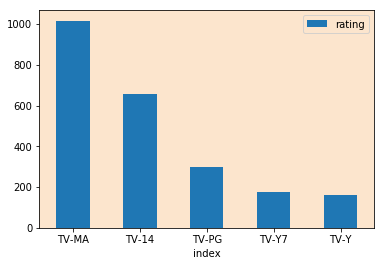

In [10]:
# recent tv shows ratings (similar process for movies and overall)
tv_shows_rating = pd.DataFrame(tv_shows['rating'].value_counts()).reset_index()
ax2 = tv_shows_rating.head(5).plot.bar(x='index', y='rating', rot=0, figsize=(6,4))

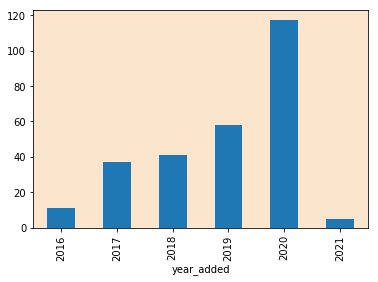

In [11]:
# ratings trends over time (similar process for movies and tv shows)
ratings_overall = recent_shows[recent_shows['rating'] == 'TV-Y']
overall_ratings_trends = ratings_overall.groupby('year_added')['rating'].count()
overall_ratings_trends.plot.bar(figsize=(6,4))

# TV Shows Duration

It looks like a significant majority of TV shows have only 1 season, with TV shows of 2 or 3 seasons complete the top 3 TV shows in terms of duration.

# Movies Duration

It looks like the majority of movies tend to last between 85 and 112 min (roughly 1 hour 25 min and 1 hour 45 min).

# Recommendations

Zuckflix should focus on content that fits within these duration trends.

For tv shows, it should focus on content with 1 to 3 seasons. I would strongly suggest tv shows with 1 season. Zuckflix should fund production of more seasons if and only if a TV show gains apparent popularity. Metrics for this could be a tv show's coverage in the media such as the way the tv show Manifest has been talked about in the media in the last 2 months.

For movies, Zuckflix should produce or fund movies that last around 1 hour and 30 min as they will be able to keep viewers interested enough in the movie without necessarily getting bored, tired, or falling asleep.

In [12]:
recent_tv_shows.loc[:, 'duration'] = recent_tv_shows['duration'].str.replace(' Season', '').str.replace('s', '')
recent_tv_shows.head(1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020


Text(0, 0.5, 'No. of TV Shows')

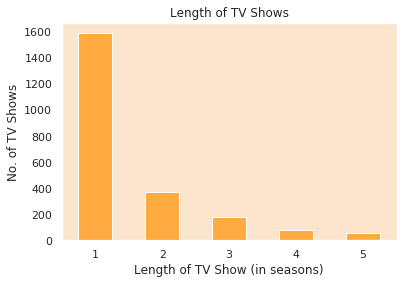

In [46]:
tv_shows_duration = pd.DataFrame(recent_tv_shows['duration'].value_counts()).reset_index()
tv_shows_duration.rename(columns={"index": "duration (in seasons)", "duration": "num of tv shows"}, inplace=True)
# tv_shows_duration.head()
ax = tv_shows_duration.head().plot.bar(x='duration (in seasons)', y='num of tv shows', title='Length of TV Shows', rot=0, figsize=(6,4), color='#ffab40', legend=False)
ax.set_xlabel('Length of TV Show (in seasons)')
ax.set_ylabel('No. of TV Shows')

In [14]:
# figure out why the copy has flaws
recent_movies.loc[:, 'duration'] = recent_movies['duration'].str.replace(' min', '')
int_movies = recent_movies.copy()
int_movies['duration'] = int_movies['duration'].astype(int)
sorted_movies = int_movies.sort_values(by=['duration'])
sorted_movies = sorted_movies[sorted_movies['duration'] < 200]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Text(0.5, 1.0, 'Length of Movies')

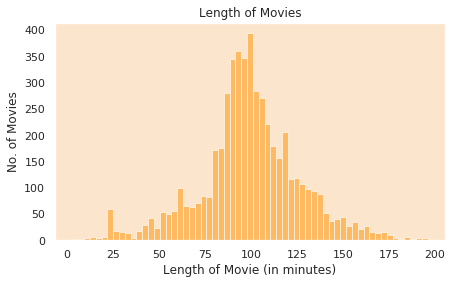

In [47]:
sns.set(rc={'figure.figsize':(7,4), 'axes.facecolor':'#fce5cd'})
sns.set_style({'axes.grid' : False})
ax = sns.histplot(data=sorted_movies, x='duration', color='#ffab40')
ax.set(xlabel="Length of Movie (in minutes)", ylabel = "No. of Movies")
plt.title("Length of Movies")

# Country Recent Trends

Analyzing all countries a movie or TV show might have been produced in the last 5 years, it looks like the US comes first with around 2000 shows produced there in total; 5 times the number of shows compared to the 2nd country (India).

The recommendation would then be for Zuckflix to focus mostly on the top 3 countries (US, India, and UK) for the next 5 years at least. Once, it is established in these places, it could look into producing contents in other countries and, especially, in Canada and France, countries that complete the top 5 countries in which most shows are produced.

In [16]:
# all recent countries
all_countries = netflix_titles.copy()

# split the strings into lists
all_countries['country'] = all_countries['country'].str.split(', ')

# explode the lists
all_countries = all_countries.explode('country').reset_index(drop=True)

# dataframe fro recent shows with all countries
sep_country_df = pd.DataFrame(all_countries['country'].value_counts()).reset_index()
sep_country_df.head()

,index,country
0,United States,3290
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349


In [17]:
# all recent countries
all_recent_countries = recent_shows.copy()

# split the strings into lists
all_recent_countries['country'] = all_recent_countries['country'].str.split(', ')

# explode the lists
all_recent_countries = all_recent_countries.explode('country').reset_index(drop=True)

# dataframe fro recent shows with all countries
rec_sep_country_df = pd.DataFrame(all_recent_countries['country'].value_counts()).reset_index()
rec_sep_country_df.head()

,index,country
0,United States,3178
1,India,990
2,United Kingdom,710
3,Canada,399
4,France,339


# Exploring if the countries trends vary for TV shows or movies

# Movies

In [50]:
# all recent countries
all_recent_countries_movies = recent_movies.copy()

# split the strings into lists
all_recent_countries_movies['country'] = all_recent_countries_movies['country'].str.split(', ')

# explode the lists
all_recent_countries_movies = all_recent_countries_movies.explode('country').reset_index(drop=True)

# dataframe fro recent shows with all countries
rec_sep_country_movies_df = pd.DataFrame(all_recent_countries_movies['country'].value_counts()).reset_index()
rec_sep_country_movies_df.head(10)

,index,country
0,United States,2348
1,India,915
2,United Kingdom,461
3,Canada,281
4,France,258
5,Spain,157
6,Germany,156
7,Japan,103
8,China,102
9,Mexico,98


# TV Shows

In [52]:
# all recent countries
all_recent_countries_tv_shows = recent_tv_shows.copy()

# split the strings into lists
all_recent_countries_tv_shows['country'] = all_recent_countries_tv_shows['country'].str.split(', ')

# explode the lists
all_recent_countries_tv_shows = all_recent_countries_tv_shows.explode('country').reset_index(drop=True)

# dataframe fro recent shows with all countries
rec_sep_country_tv_shows_df = pd.DataFrame(all_recent_countries_tv_shows['country'].value_counts()).reset_index()
rec_sep_country_tv_shows_df.head(10)

,index,country
0,United States,830
1,United Kingdom,249
2,Japan,182
3,South Korea,157
4,Canada,118
5,France,81
6,India,75
7,Taiwan,70
8,Australia,57
9,Spain,57


# Country and Movies vs. TV Shows

It looks like most movies are produced in the top 5 countries as all shows. However, for TV shows, we notice different trends; the US, UK, South Korea, and Japan seem to dominate the market.

This tells us that Zuckflix would need to implement different strategies for movies and TV shows in order to be most successful in this venture.

# Exploring the most popular genres

# Movies

International movies seem to be most popular, followed by dramas, comedies, documentaries, and independent movies.

# TV Shows

Similar trends with the movies can be observed for the top 3 genres: International TV shows, TV Dramas, TV comedies are most popular. They are followed by crime TV shows and Kids TV.

Although the trends might not be very pronounced (especially for TV shows), analysis suggest that international, drama, and comedy are most popular accross both movies and TV shows. Zuckflix should, therefore, first focus on these.

If Zuckflix becomes successful in the long run (at least 1 or 2 years), it could expand into other genres.

# Code for previous conclusions

First are the movies, and second are the TV shows.

In [20]:
# copying the dataframe
all_movies_genres = recent_movies.copy()

# split the strings into lists
all_movies_genres['listed_in'] = all_movies_genres['listed_in'].str.split(', ')

# explode the lists
all_movies_genres = all_movies_genres.explode('listed_in').reset_index(drop=True)

# dataframe fro recent shows with all countries
movies_genres_df = pd.DataFrame(all_movies_genres['listed_in'].value_counts()).reset_index()
movies_genres_df.head()

,index,listed_in
0,International Movies,2423
1,Dramas,2079
2,Comedies,1454
3,Documentaries,763
4,Action & Adventure,718


In [21]:
# copying the dataframe
all_tv_shows_genres = recent_tv_shows.copy()

# split the strings into lists
all_tv_shows_genres['listed_in'] = all_tv_shows_genres['listed_in'].str.split(', ')

# explode the lists
all_tv_shows_genres = all_tv_shows_genres.explode('listed_in').reset_index(drop=True)

# dataframe fro recent shows with all countries
tv_shows_genres_df = pd.DataFrame(all_tv_shows_genres['listed_in'].value_counts()).reset_index()
tv_shows_genres_df.head()

,index,listed_in
0,International TV Shows,1194
1,TV Dramas,687
2,TV Comedies,504
3,Crime TV Shows,422
4,Kids' TV,397


# Analysis of trends in a specific country: France

# Overall Findings

Content entirely produced in France is almost equal to content partially produced in France. 115 exclusively produced in France and 349 produced fully or in part in France.

# Over the last 5 years

Content exclusively produced in France is almost a 3rd of all content produced (fully or partially) in France. This shows a decline in content exclusively produced in France.

In [22]:
# france content (fully or partially)
france_content = netflix_titles[netflix_titles['country'] == 'France']
all_france_content = all_countries[all_countries['country'] == 'France']

In [23]:
rec_france_content = recent_shows[recent_shows['country'] == 'France']
all_rec_france_content = all_recent_countries[all_recent_countries['country'] == 'France']
all_rec_france_content

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
53,s50,Movie,10 jours en or,Nicolas Brossette,"Franck Dubosc, Claude Rich, Marie Kremer, Math...",France,2017-07-01,2012,TV-14,97 min,"Comedies, Dramas, International Movies",When a carefree bachelor is unexpectedly left ...,2017
86,s78,Movie,2 Alone in Paris,"Ramzy Bedia, Éric Judor","Ramzy Bedia, Éric Judor, Benoît Magimel, Krist...",France,2020-06-01,2008,TV-MA,97 min,"Comedies, International Movies",A bumbling Paris policeman is doggedly determi...,2020
108,s97,Movie,3 Days to Kill,McG,"Kevin Costner, Amber Heard, Hailee Steinfeld, ...",France,2020-12-01,2014,PG-13,117 min,Action & Adventure,A terminally ill secret agent accepts a risky ...,2020
119,s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...",France,2019-10-01,1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br...",2019
182,s163,Movie,A Christmas Special: Miraculous: Tales of Lady...,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...",France,2016-12-20,2016,TV-Y7,22 min,Movies,Parisian teen Marinette transforms herself int...,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,s7634,Movie,Winnie,Pascale Lamche,NaN,France,2018-02-26,2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...,2018
9316,s7743,Movie,Your Son,Miguel Ángel Vivas,"José Coronado, Ana Wagener, Asia Ortega, Pol M...",France,2019-03-01,2018,TV-MA,103 min,"Dramas, International Movies, Thrillers",After his son is brutally beaten outside a nig...,2019
9322,s7748,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...",France,2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,2018
9336,s7760,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",France,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018


In [24]:
# all_rec_france_content_trends = all_rec_france_content.groupby('release_year').count()
# all_rec_france_content_trends.plot.bar(figsize=(6,4))

# France Movies vs. TV Shows

We have 146 movies and 59 TV shows; which suggests the popularity of movies more than TV shows.
However, if we consider trends over the last 5 years, we notice a significant decrease in the number of movies produced while we can observe a more or less relative increase in the number of TV show offerings.

# Note:
An interesting observation is that there was no show released yet in 2021 at the time this dataset was made available on Kaggle.

In [25]:
all_rec_france_movies = all_rec_france_content[all_rec_france_content['type'] == 'Movie']
all_rec_france_movies.count()[0]

258

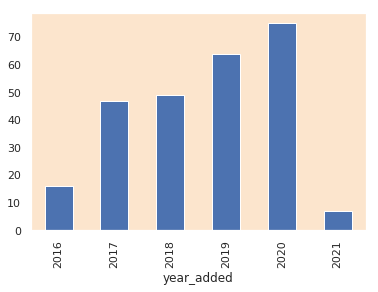

In [26]:
all_rec_france_movies = all_rec_france_content[all_rec_france_content['type'] == 'Movie']
all_rec_france_movies_trends = all_rec_france_movies.groupby('year_added')['type'].count()
all_rec_france_movies_trends.plot.bar(figsize=(6,4))

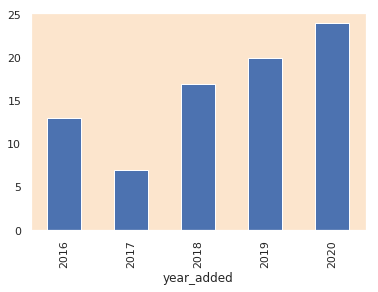

In [27]:
all_rec_france_tv_shows = all_rec_france_content[all_rec_france_content['type'] == 'TV Show']
all_rec_france_tv_shows_trends = all_rec_france_tv_shows.groupby('year_added')['type'].count()
all_rec_france_tv_shows_trends.plot.bar(figsize=(6,4))

# France Content Ratings

For movies, content rated TV-MA is largely more popular, followed by TV-14 and R rated content.

For TV shows, content rated TV-MA is largely more popular compared to the other 4 ratings (TV-Y, TV-Y7, TV-PG, and TV-14).

# Recommendation

Although there is a decrease in TV-MA in 2020 compared to 2019, I would recommend Zuckflix to focus on content rated TV-MA. That decrease could potentially be explained by the slow down of show production in 2020 (due to Covid-19).

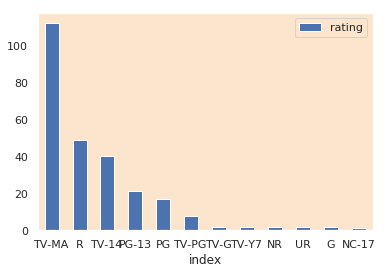

In [28]:
france_movies_rating = pd.DataFrame(all_rec_france_movies['rating'].value_counts()).reset_index()
frax1 = france_movies_rating.plot.bar(x='index', y='rating', rot=0, figsize=(6,4))

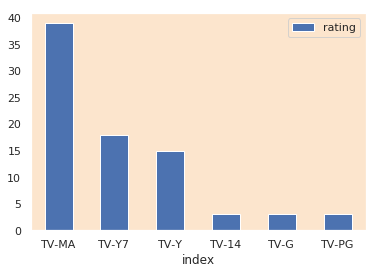

In [29]:
france_tv_shows_rating = pd.DataFrame(all_rec_france_tv_shows['rating'].value_counts()).reset_index()
frax2 = france_tv_shows_rating.plot.bar(x='index', y='rating', rot=0, figsize=(6,4))

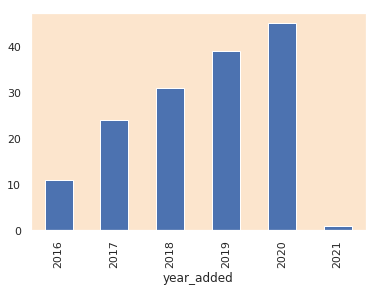

In [30]:
france_ratings_overall = all_rec_france_content[all_rec_france_content['rating'] == 'TV-MA']
france_overall_ratings_trends = france_ratings_overall.groupby('year_added')['rating'].count()
france_overall_ratings_trends.plot.bar(figsize=(6,4))

#  Duration Trends for France

Same trends for tv shows; mostly 1 season, followed by 2 or 3 seasons for top 3.

Most movies seem to last between 80 and 100 minutes (roughly 1 hour 20 minutes and 1 hour 40 minutes).

# Recommendation

Focus on content of that length.

In [31]:
all_rec_france_tv_shows.loc[:, 'duration'] = all_rec_france_tv_shows['duration'].str.replace(' Season', '').str.replace('s', '')
all_rec_france_tv_shows.head(1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
296,s249,TV Show,A Very Secret Service,NaN,"Hugo Becker, Wilfred Benaïche, Christophe Kour...",France,2018-07-30,2018,TV-MA,2,"International TV Shows, TV Comedies","At the height of the Cold War in 1960, André M...",2018


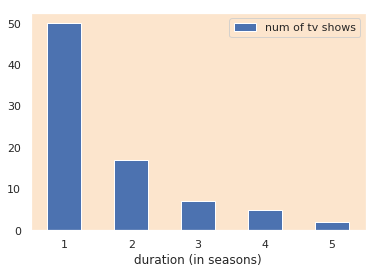

In [32]:
all_rec_france_tv_shows_duration = pd.DataFrame(all_rec_france_tv_shows['duration'].value_counts()).reset_index()
all_rec_france_tv_shows_duration.rename(columns={"index": "duration (in seasons)", "duration": "num of tv shows"}, inplace=True)
# tv_shows_duration.head()
frax3 = all_rec_france_tv_shows_duration.head().plot.bar(x='duration (in seasons)', y='num of tv shows', rot=0, figsize=(6,4))

In [33]:
# figure out why the copy has flaws
all_rec_france_movies.loc[:, 'duration'] = all_rec_france_movies['duration'].str.replace(' min', '')
int_france_movies = all_rec_france_movies.copy()
int_france_movies['duration'] = int_france_movies['duration'].astype(int)
sorted_france_movies = int_france_movies.sort_values(by=['duration'])
# sorted_france_movies = sorted_france_movies[sorted_movies['duration'] < 200]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


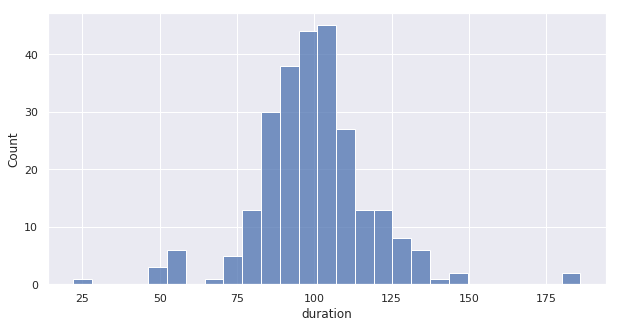

In [34]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=sorted_france_movies, x='duration')

# Genre Trends for France

# Movies

International movies as well as dramas seem to be most popular.

It would be great for Zuckflix to focus on those in the first few years.

In [35]:
# copying the dataframe
all_france_movies_genres = all_rec_france_movies.copy()

# split the strings into lists
all_france_movies_genres['listed_in'] = all_france_movies_genres['listed_in'].str.split(', ')

# explode the lists
all_france_movies_genres = all_france_movies_genres.explode('listed_in').reset_index(drop=True)

# dataframe fro recent shows with all countries
france_movies_genres_df = pd.DataFrame(all_france_movies_genres['listed_in'].value_counts()).reset_index()
france_movies_genres_df.head()

,index,listed_in
0,International Movies,187
1,Dramas,142
2,Independent Movies,61
3,Comedies,47
4,Documentaries,41


# TV Shows

International TV shows as well as TV drams and kids TV are most popular.

Probably, Zuckflix should focus on international TV shows

In [36]:
# copying the dataframe
all_france_tv_shows_genres = all_rec_france_tv_shows.copy()

# split the strings into lists
all_france_tv_shows_genres['listed_in'] = all_france_tv_shows_genres['listed_in'].str.split(', ')

# explode the lists
all_france_tv_shows_genres = all_france_tv_shows_genres.explode('listed_in').reset_index(drop=True)

# dataframe fro recent shows with all countries
france_tv_shows_genres_df = pd.DataFrame(all_france_tv_shows_genres['listed_in'].value_counts()).reset_index()
france_tv_shows_genres_df.head()

,index,listed_in
0,International TV Shows,40
1,Kids' TV,38
2,TV Dramas,25
3,TV Comedies,21
4,Crime TV Shows,20


# Remaining Analysis

## Priority


## Less Priority
director
cast
date_added vs. release_year
description (probably not)

# To Do if Time Allows

Check what are the countries where content partially produced in France is also produced

In [37]:
netflix_titles

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020
